In [1]:
from utils.model_utils import CryptoDataset, calculate_indicators, check_for_missing_data, normalize_data, create_targets, profitable_percent

In [2]:
doge = doge = CryptoDataset('DOGE/USD', '5m', '2023-01-01 00:00:00', '2023-10-01 00:00:00')

In [ ]:

doge.fetch()

In [3]:
doge.save()

ValueError: No dataset available to save.

In [45]:
import numpy as np
import pandas as pd
import talib

def create_features(df, price_col='close', window_size=14):
    """
    Create a comprehensive set of features for financial time series analysis.
    
    Parameters:
    df (pd.DataFrame): DataFrame containing the price data.
    price_col (str): Name of the column with the price data.
    window_size (int): Window size for calculating moving averages and other indicators.

    Returns:
    pd.DataFrame: DataFrame with newly created features.
    """
    # Ensure the 'Close' column exists
    if price_col not in df.columns:
        raise ValueError(f"{price_col} column not found in the DataFrame.")

    # Calculate moving averages
    df['SMA_20'] = talib.SMA(df[price_col], timeperiod=20)
    df['SMA_50'] = talib.SMA(df[price_col], timeperiod=50)
    
    # Exponential Moving Average (EMA)
    df['EMA_12'] = talib.EMA(df[price_col], timeperiod=12)
    df['EMA_26'] = talib.EMA(df[price_col], timeperiod=26)

    # Calculate RSI (Relative Strength Index)
    df['RSI_14'] = talib.RSI(df[price_col], timeperiod=14)

    # Calculate MACD and MACD Signal Line
    df['MACD'], df['MACD_signal'], _ = talib.MACD(df[price_col], fastperiod=12, slowperiod=26, signalperiod=9)

    # Bollinger Bands (SMA with upper and lower bands)
    df['BB_upper'], df['BB_middle'], df['BB_lower'] = talib.BBANDS(df[price_col], timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)

    # Average True Range (ATR)
    df['ATR_14'] = talib.ATR(df['high'], df['low'], df[price_col], timeperiod=14)

    # Stochastic Oscillator (Fast K and D)
    df['Stoch_K'], df['Stoch_D'] = talib.STOCH(df['high'], df['low'], df[price_col], fastk_period=14, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)

    # Rate of Change (ROC)
    df['ROC'] = talib.ROC(df[price_col], timeperiod=12)

    # Moving Average Convergence Divergence (MACD Histogram)
    df['MACD_hist'] = df['MACD'] - df['MACD_signal']

    # Standard Deviation of Returns (Volatility)
    df['return'] = df[price_col].pct_change()
    df['volatility'] = df['return'].rolling(window=window_size).std()

    # Mean of returns (optional)
    df['mean_return'] = df['return'].rolling(window=window_size).mean()

    # AD - Chaikin A/D line
    df['AD'] = talib.AD(df['high'], df['low'], df['close'], df['volume'])

    # OBV - On Balance Volume
    df['OBV'] = talib.OBV(df['close'], df['volume'])

    df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

    df['day'] = df['timestamp'].dt.day
    df['hour'] = df['timestamp'].dt.hour
    df['minute'] = df['timestamp'].dt.minute
    df['day_of_week'] = df['timestamp'].dt.dayofweek


    # Drop rows with NaN values resulting from rolling calculations
    df.dropna(inplace=True)
    df = df.drop(columns=['timestamp'])

    return df


In [64]:

doge.load('data/DOGEUSD_5m_v1.csv')
doge.data

Dataset loaded from data/DOGEUSD_5m_v1.csv.


,timestamp,open,high,low,close,volume
0,2023-01-01 00:00:00,0.07020,0.07030,0.07010,0.07010,135092.0
1,2023-01-01 00:05:00,0.07020,0.07020,0.07000,0.07010,24470.0
2,2023-01-01 00:10:00,0.07010,0.07010,0.06980,0.06990,1021507.0
3,2023-01-01 00:15:00,0.06980,0.06990,0.06960,0.06960,199628.0
4,2023-01-01 00:20:00,0.06970,0.06990,0.06970,0.06990,127444.0
...,...,...,...,...,...,...
50922,2023-06-27 02:35:00,0.06226,0.06226,0.06226,0.06226,0.0
50923,2023-06-27 02:40:00,0.06226,0.06226,0.06226,0.06226,0.0
50924,2023-06-27 02:45:00,0.06226,0.06226,0.06226,0.06226,0.0
50925,2023-06-27 02:50:00,0.06226,0.06226,0.06226,0.06226,0.0


In [65]:
import talib
import numpy as np
import pandas as pd

def create_features(dataframe):
    """
    Calculate a wide range of technical indicators using TA-Lib and return them as a dictionary.
    
    Parameters:
    dataframe (pd.DataFrame): A DataFrame with 'open', 'high', 'low', 'close', and 'volume' columns.
    
    Returns:
    dict: A dictionary with indicator names as keys and calculated values as values.
    """
    indicators = {}


    # Price-based Indicators
    # indicators['BBANDS_upper'], indicators['BBANDS_middle'], indicators['BBANDS_lower'] = talib.BBANDS(dataframe['close'])
    # indicators['DEMA'] = talib.DEMA(dataframe['close'])
    # indicators['EMA'] = talib.EMA(dataframe['close'])
    # indicators['HT_TRENDLINE'] = talib.HT_TRENDLINE(dataframe['close'])
    # indicators['KAMA'] = talib.KAMA(dataframe['close'])
    # indicators['MA'] = talib.MA(dataframe['close'])
    # indicators['MAMA_1'], indicators['MAMA_2'] = talib.MAMA(dataframe['close'])
    # indicators['MIDPOINT'] = talib.MIDPOINT(dataframe['close'])
    # indicators['MIDPRICE'] = talib.MIDPRICE(dataframe['high'], dataframe['low'])
    # indicators['SAR'] = talib.SAR(dataframe['high'], dataframe['low'])
    indicators['SAREXT'] = talib.SAREXT(dataframe['high'], dataframe['low'])
    # indicators['SMA'] = talib.SMA(dataframe['close'])
    # indicators['T3'] = talib.T3(dataframe['close'])
    # indicators['TEMA'] = talib.TEMA(dataframe['close'])
    # indicators['TRIMA'] = talib.TRIMA(dataframe['close'])
    # indicators['WMA'] = talib.WMA(dataframe['close'])
    
    # Momentum Indicators
    indicators['ADX'] = talib.ADX(dataframe['high'], dataframe['low'], dataframe['close'])
    indicators['ADXR'] = talib.ADXR(dataframe['high'], dataframe['low'], dataframe['close'])
    indicators['APO'] = talib.APO(dataframe['close'])
    indicators['AROON_up'], indicators['AROON_down'] = talib.AROON(dataframe['high'], dataframe['low'])
    indicators['AROONOSC'] = talib.AROONOSC(dataframe['high'], dataframe['low'])
    indicators['BOP'] = talib.BOP(dataframe['open'], dataframe['high'], dataframe['low'], dataframe['close'])
    indicators['CCI'] = talib.CCI(dataframe['high'], dataframe['low'], dataframe['close'])
    indicators['CMO'] = talib.CMO(dataframe['close'])
    indicators['DX'] = talib.DX(dataframe['high'], dataframe['low'], dataframe['close'])
    indicators['MACD'], indicators['MACD_signal'], indicators['MACD_hist'] = talib.MACD(dataframe['close'])
    indicators['MFI'] = talib.MFI(dataframe['high'], dataframe['low'], dataframe['close'], dataframe['volume'])
    indicators['MINUS_DI'] = talib.MINUS_DI(dataframe['high'], dataframe['low'], dataframe['close'])
    indicators['MINUS_DM'] = talib.MINUS_DM(dataframe['high'], dataframe['low'])
    indicators['MOM'] = talib.MOM(dataframe['close'])
    indicators['PLUS_DI'] = talib.PLUS_DI(dataframe['high'], dataframe['low'], dataframe['close'])
    indicators['PLUS_DM'] = talib.PLUS_DM(dataframe['high'], dataframe['low'])
    indicators['PPO'] = talib.PPO(dataframe['close'])
    indicators['ROC'] = talib.ROC(dataframe['close'])
    indicators['ROCP'] = talib.ROCP(dataframe['close'])
    indicators['ROCR'] = talib.ROCR(dataframe['close'])
    indicators['ROCR100'] = talib.ROCR100(dataframe['close'])
    indicators['RSI'] = talib.RSI(dataframe['close'])
    indicators['STOCH_k'], indicators['STOCH_d'] = talib.STOCH(dataframe['high'], dataframe['low'], dataframe['close'])
    indicators['STOCHF_k'], indicators['STOCHF_d'] = talib.STOCHF(dataframe['high'], dataframe['low'], dataframe['close'])
    indicators['TRIX'] = talib.TRIX(dataframe['close'])
    indicators['ULTOSC'] = talib.ULTOSC(dataframe['high'], dataframe['low'], dataframe['close'])
    indicators['WILLR'] = talib.WILLR(dataframe['high'], dataframe['low'], dataframe['close'])
    
    # Volume Indicators
    indicators['AD'] = talib.AD(dataframe['high'], dataframe['low'], dataframe['close'], dataframe['volume'])
    indicators['ADOSC'] = talib.ADOSC(dataframe['high'], dataframe['low'], dataframe['close'], dataframe['volume'])
    indicators['OBV'] = talib.OBV(dataframe['close'], dataframe['volume'])
    
    # Cycle Indicators
    indicators['HT_DCPERIOD'] = talib.HT_DCPERIOD(dataframe['close'])
    indicators['HT_DCPHASE'] = talib.HT_DCPHASE(dataframe['close'])
    indicators['HT_TRENDMODE'] = talib.HT_TRENDMODE(dataframe['close'])
    
    # Price Transform
    # indicators['AVGPRICE'] = talib.AVGPRICE(dataframe['open'], dataframe['high'], dataframe['low'], dataframe['close'])
    # indicators['MEDPRICE'] = talib.MEDPRICE(dataframe['high'], dataframe['low'])
    # indicators['TYPPRICE'] = talib.TYPPRICE(dataframe['high'], dataframe['low'], dataframe['close'])
    # indicators['WCLPRICE'] = talib.WCLPRICE(dataframe['high'], dataframe['low'], dataframe['close'])
    
    # Volatility Indicators
    indicators['ATR'] = talib.ATR(dataframe['high'], dataframe['low'], dataframe['close'])
    indicators['NATR'] = talib.NATR(dataframe['high'], dataframe['low'], dataframe['close'])
    indicators['TRANGE'] = talib.TRANGE(dataframe['high'], dataframe['low'], dataframe['close'])
    
    # Time Indicators 
    dataframe['timestamp'] = pd.to_datetime(dataframe['timestamp'], errors='coerce')
    indicators['day'] = dataframe['timestamp'].dt.day
    indicators['hour'] = dataframe['timestamp'].dt.hour
    indicators['minute'] = dataframe['timestamp'].dt.minute



    # Create a new DataFrame from the dictionary
    new_cols = pd.DataFrame(indicators)

    # Concatenate the new DataFrame with the original DataFrame
    indicators_df = pd.concat([dataframe, new_cols], axis=1)
    indicators_df.dropna(inplace=True)       
    indicators_df = indicators_df.drop(columns=['timestamp'])


    indicators_df = indicators_df.drop(columns=['high'])
    indicators_df = indicators_df.drop(columns=['low'])
    indicators_df = indicators_df.drop(columns=['open'])


    #indicators_df = pd.DataFrame(indicators, index=dataframe.index)
    return indicators_df




In [66]:

# Call the function to add features to your DataFrame
feature_df = create_features(doge.data)

feature_df.head()

,close,volume,SAREXT,ADX,ADXR,APO,AROON_up,AROON_down,AROONOSC,BOP,...,OBV,HT_DCPERIOD,HT_DCPHASE,HT_TRENDMODE,ATR,NATR,TRANGE,day,hour,minute
88,0.0691,19741.0,-0.069473,16.097381,14.448769,-0.000017,100.000000,0.000000,-100.000000,0.0,...,-1316698.0,22.412808,261.572026,0,0.000065,0.093927,0.0000,1,7,20
89,0.0691,29731.0,-0.069458,17.593783,14.780443,-0.000042,100.000000,28.571429,-71.428571,0.0,...,-1316698.0,21.928195,281.971410,0,0.000060,0.087218,0.0000,1,7,25
90,0.0692,88831.0,-0.069443,17.384137,14.288845,-0.000063,92.857143,21.428571,-71.428571,0.0,...,-1227867.0,21.710997,302.571141,0,0.000063,0.091193,0.0001,1,7,30
91,0.0692,69462.0,-0.069430,17.189465,13.832360,-0.000067,85.714286,14.285714,-71.428571,0.0,...,-1227867.0,22.238122,309.439081,0,0.000059,0.084679,0.0000,1,7,35
92,0.0693,378.0,-0.069416,16.219110,13.372770,-0.000063,78.571429,7.142857,-71.428571,0.0,...,-1227489.0,23.360472,-43.462843,0,0.000062,0.088825,0.0001,1,7,40


In [67]:
doge.data = feature_df
doge.save('data/indicated_DOGEUSD_5m_v1.csv')

Dataset saved to data/indicated_DOGEUSD_5m_v1.csv.


In [1]:
import seaborn as sns
#import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = feature_df.corr()

# Plot the heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)

plt.title('Feature Correlation Matrix')
plt.show()


ModuleNotFoundError: No module named 'seaborn'

In [32]:
# Window size is the number of candles to base predctions on
# Look ahead is the number of candles in which to find the max and min price in
X, y = create_targets(feature_df, 100, 25)


In [33]:
print(X.shape)
X = X.reshape(X.shape[0], -1)
print(X.shape)


(50714, 100, 46)
(50714, 4600)


In [34]:
y_max = y[:, 0]  # Grabs all rows of the first column
print(y_max.shape)

(50714,)


In [35]:
from sklearn.model_selection import train_test_split

X_big, X_small, y_big, y_small = train_test_split(X, y_max, test_size=0.2, random_state=42)



In [36]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import matplotlib.pyplot as plt

print("Initializing Random Forest Regressor with verbose output...")
rf = RandomForestRegressor(n_estimators=20, random_state=42, verbose=2)  # Verbose output
print("Fitting the model...")
rf.fit(X_small, y_small)  # Progress will be printed to the console

print("Training complete. Extracting feature importances...")


Initializing Random Forest Regressor with verbose output...
Fitting the model...
building tree 1 of 20
building tree 2 of 20
building tree 3 of 20
building tree 4 of 20
building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20
building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20
building tree 17 of 20
building tree 18 of 20
building tree 19 of 20
building tree 20 of 20
Training complete. Extracting feature importances...


In [37]:
import pandas as pd
import numpy as np

# Assume column names are in a list (use indices if no names are available)
column_names = [f"Feature_{i}" for i in range(X_small.shape[1])]

# Convert NumPy array to DataFrame
X_small_df = pd.DataFrame(X_small, columns=column_names)

# Create feature importance Series
feature_importances = pd.Series(rf.feature_importances_, index=X_small_df.columns).sort_values(ascending=False)


In [40]:

# Simulated feature importances from the model (replace this with `rf.feature_importances_`)
feature_importances = rf.feature_importances_

# Number of indicators and candles
num_indicators = 46
num_candles = 100

# Reshape feature importances into [candles, indicators]
reshaped_importances = feature_importances.reshape(num_candles, num_indicators)

# Aggregate importance for each indicator across all candles
indicator_importances = reshaped_importances.sum(axis=0)

# Create a DataFrame for better visualization
indicator_df = pd.DataFrame({
    'Indicator': [f'Indicator_{i+1}' for i in range(num_indicators)],
    'Importance': indicator_importances
}).sort_values(by='Importance', ascending=False)

46
Indicator: MFI, Importance: 0.1272
Indicator: NATR, Importance: 0.0753
Indicator: PLUS_DI, Importance: 0.0516
Indicator: HT_DCPHASE, Importance: 0.0417
Indicator: ULTOSC, Importance: 0.0340
Indicator: ATR, Importance: 0.0335
Indicator: CCI, Importance: 0.0316
Indicator: MINUS_DI, Importance: 0.0309
Indicator: HT_DCPERIOD, Importance: 0.0296
Indicator: volume, Importance: 0.0287
Indicator: MACD_signal, Importance: 0.0270
Indicator: ADOSC, Importance: 0.0256
Indicator: DX, Importance: 0.0247
Indicator: PLUS_DM, Importance: 0.0247
Indicator: OBV, Importance: 0.0229
Indicator: STOCH_k, Importance: 0.0221
Indicator: SAREXT, Importance: 0.0214
Indicator: MACD, Importance: 0.0212
Indicator: CMO, Importance: 0.0178
Indicator: ADX, Importance: 0.0163
Indicator: STOCH_d, Importance: 0.0162
Indicator: MACD_hist, Importance: 0.0158
Indicator: TRANGE, Importance: 0.0154
Indicator: ROCR100, Importance: 0.0154
Indicator: ROCR, Importance: 0.0145


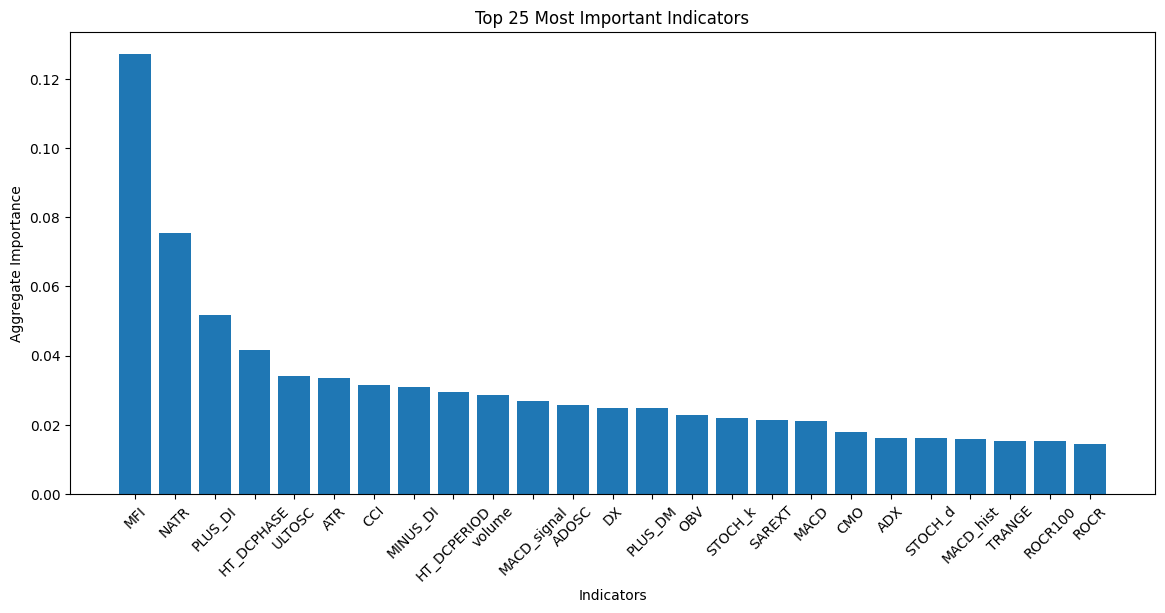

In [44]:
# List of indicator names (from your provided names)
indicator_names = [
    "volume", "SAREXT", 
    "ADX", "ADXR", "APO", "AROON_up", "AROON_down", "AROONOSC", 
    "BOP", "CCI", "CMO", "DX", "MACD", "MACD_signal", "MACD_hist", "MFI", 
    "MINUS_DI", "MINUS_DM", "MOM", "PLUS_DI", "PLUS_DM", "PPO", "ROC", "ROCP", 
    "ROCR", "ROCR100", "RSI", "STOCH_k", "STOCH_d", "STOCHF_k", "STOCHF_d", 
    "TRIX", "ULTOSC", "WILLR", "AD", "ADOSC", "OBV", "HT_DCPERIOD", 
    "HT_DCPHASE", "HT_TRENDMODE", "ATR", "NATR", "TRANGE", "day", "hour", "minute"
]

print(len(indicator_names))
# Make sure the length of indicator_names matches the number of indicators
assert len(indicator_names) == len(indicator_importances), "Mismatch in number of indicators!"

# Pair indicators with their aggregated importance
indicator_importance_mapping = list(zip(indicator_names, indicator_importances))

# Sort by importance (descending)
sorted_indicators = sorted(indicator_importance_mapping, key=lambda x: x[1], reverse=True)

# Display the top N indicators
top_n = 25
for name, importance in sorted_indicators[:top_n]:
    print(f"Indicator: {name}, Importance: {importance:.4f}")

# Plot the top N indicators
top_n_indicators = sorted_indicators[:top_n]
labels, values = zip(*top_n_indicators)

plt.figure(figsize=(14, 6))
plt.bar(labels, values)
plt.title(f'Top {top_n} Most Important Indicators')
plt.xlabel('Indicators')
plt.ylabel('Aggregate Importance')
plt.xticks(rotation=45)
plt.show()



    Row Number  Importance
77          78    0.044361
83          84    0.043283
98          99    0.034627
93          94    0.034483
72          73    0.031881
..         ...         ...
24          25    0.004375
12          13    0.004312
34          35    0.003984
47          48    0.003929
10          11    0.003468

[100 rows x 2 columns]


<Figure size 1200x600 with 0 Axes>

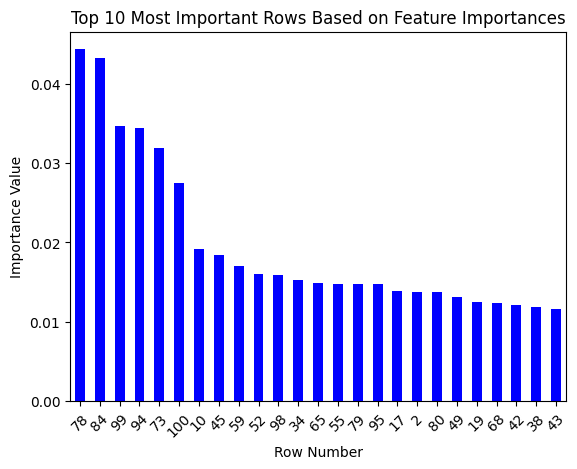

In [52]:

# Simulated feature importances from the model (replace this with `rf.feature_importances_`)
feature_importances = rf.feature_importances_

# Number of indicators and candles
num_indicators = 46
num_candles = 100

# Reshape feature importances into [candles, indicators]
reshaped_importances = feature_importances.reshape(num_candles, num_indicators)

# Aggregate importance for each row (candle) across all indicators
row_importances = reshaped_importances.sum(axis=1)

# Create a DataFrame for better visualization
row_importance_df = pd.DataFrame({
    'Row Number': range(1, num_candles + 1),  # Row numbers from 1 to 100
    'Importance': row_importances
}).sort_values(by='Importance', ascending=False)

# Display the top rows for verification
print(row_importance_df.head(100))

import matplotlib.pyplot as plt

# Plot the top 10 most important rows
plt.figure(figsize=(12, 6))
row_importance_df.head(25).plot(kind='bar', x='Row Number', y='Importance', legend=False, color='blue')
plt.title('Top 10 Most Important Rows Based on Feature Importances')
plt.xlabel('Row Number')
plt.ylabel('Importance Value')
plt.xticks(rotation=45)
plt.show()

In [53]:
# Sample importances from two targets
target1_importances = max_price_correlation

target2_importances = min_price_correlation

# Combine importances
combined_importances = {}
for feature in set(target1_importances) | set(target2_importances):
    importance1 = target1_importances.get(feature, 0)
    importance2 = target2_importances.get(feature, 0)
    combined_importances[feature] = (importance1 + importance2) / 2  # Average

# Sort by overall importance
sorted_combined_importances = sorted(combined_importances.items(), key=lambda x: x[1], reverse=True)

# Print the sorted importances
for feature, importance in sorted_combined_importances:
    print(f"{feature}: {importance:.4f}")


MFI: 0.0846
HT_DCPERIOD: 0.0738
NATR: 0.0611
ATR: 0.0578
HT_DCPHASE: 0.0466
CCI: 0.0338
ULTOSC: 0.0312
volume: 0.0307
ADOSC: 0.0303
DX: 0.0291
PLUS_DM: 0.0277
PLUS_DI: 0.0258
MINUS_DI: 0.0255
SAREXT: 0.0238
ADX: 0.0231
MINUS_DM: 0.0231
RSI: 0.0229
AD: 0.0224
ADXR: 0.0194
MACD_hist: 0.0164
STOCH_d: 0.0158
CMO: 0.0158
MOM: 0.0152
TRANGE: 0.0148
OBV: 0.0136
ROC: 0.0112
WILLR: 0.0109
TRIX: 0.0109
AROON_down: 0.0109
hour: 0.0106
day: 0.0103
MACD: 0.0102
STOCH_k: 0.0101
AROONOSC: 0.0096
PPO: 0.0085
MACD_signal: 0.0080
AROON_up: 0.0077
STOCHF_k: 0.0075
ROCR: 0.0074
APO: 0.0073
STOCHF_d: 0.0067
ROCR100: 0.0066
KAMA: 0.0059
ROCP: 0.0055
BOP: 0.0053
BBANDS_upper: 0.0043
minute: 0.0040
HT_TRENDLINE: 0.0033
MIDPOINT: 0.0030
MAMA_2: 0.0025
low: 0.0025
TEMA: 0.0021
SAR: 0.0020
BBANDS_lower: 0.0019
high: 0.0019
WCLPRICE: 0.0017
HT_TRENDMODE: 0.0016
MIDPRICE: 0.0013
DEMA: 0.0013
WMA: 0.0012
EMA: 0.0011
TRIMA: 0.0010
T3: 0.0010
AVGPRICE: 0.0009
open: 0.0009
SMA: 0.0009
TYPPRICE: 0.0009
BBANDS_middle: 0

In [1]:
importance_list = [
    ('MFI', 0.0846),
    ('HT_DCPERIOD', 0.0738),
    ('NATR', 0.0611),
    ('ATR', 0.0578),
    ('HT_DCPHASE', 0.0466),
    ('CCI', 0.0338),
    ('ULTOSC', 0.0312),
    ('volume', 0.0307),
    ('ADOSC', 0.0303),
    ('DX', 0.0291),
    ('PLUS_DM', 0.0277),
    ('PLUS_DI', 0.0258),
    ('MINUS_DI', 0.0255),
    ('SAREXT', 0.0238),
    ('ADX', 0.0231),
    ('MINUS_DM', 0.0231),
    ('RSI', 0.0229),
    ('AD', 0.0224),
    ('ADXR', 0.0194),
    ('MACD_hist', 0.0164),
    ('STOCH_d', 0.0158),
    ('CMO', 0.0158),
    ('MOM', 0.0152),
    ('TRANGE', 0.0148),
    ('OBV', 0.0136),
    ('ROC', 0.0112),
    ('WILLR', 0.0109),
    ('TRIX', 0.0109),
    ('AROON_down', 0.0109),
    ('hour', 0.0106),
    ('day', 0.0103),
    ('MACD', 0.0102),
    ('STOCH_k', 0.0101),
    ('AROONOSC', 0.0096),
    ('PPO', 0.0085),
    ('MACD_signal', 0.0080),
    ('AROON_up', 0.0077),
    ('STOCHF_k', 0.0075),
    ('ROCR', 0.0074),
    ('APO', 0.0073),
    ('STOCHF_d', 0.0067),
    ('ROCR100', 0.0066),
    ('ROCP', 0.0055),
    ('BOP', 0.0053),
    ('minute', 0.0040),
    ('HT_TRENDMODE', 0.0016)
]


In [2]:
new_list = [a for a, b in importance_list]


In [3]:
new_list

['MFI',
 'HT_DCPERIOD',
 'NATR',
 'ATR',
 'HT_DCPHASE',
 'CCI',
 'ULTOSC',
 'volume',
 'ADOSC',
 'DX',
 'PLUS_DM',
 'PLUS_DI',
 'MINUS_DI',
 'SAREXT',
 'ADX',
 'MINUS_DM',
 'RSI',
 'AD',
 'ADXR',
 'MACD_hist',
 'STOCH_d',
 'CMO',
 'MOM',
 'TRANGE',
 'OBV',
 'ROC',
 'WILLR',
 'TRIX',
 'AROON_down',
 'hour',
 'day',
 'MACD',
 'STOCH_k',
 'AROONOSC',
 'PPO',
 'MACD_signal',
 'AROON_up',
 'STOCHF_k',
 'ROCR',
 'APO',
 'STOCHF_d',
 'ROCR100',
 'ROCP',
 'BOP',
 'minute',
 'HT_TRENDMODE']

In [79]:
import numpy as np


# Rank the importance scores
sorted_feature_names = [feature for feature, _ in sorted(importance_list, key=lambda x: x[1], reverse=True)]

# Set your threshold for dropping rows (e.g., keep top 20% by importance rank)
num_top_indices = 20

# Select the top-ranked rows
top_ranked_indices = sorted_feature_names[:num_top_indices]

# Filter the tensor based on the top-ranked indices
filtered_df = feature_df[top_ranked_indices]
filtered_df['close'] = feature_df['close']  # Add the target column back if needed

# filtered_tensor now contains only the rows with the top importance scores
print(filtered_df.shape)  # Should be (num_top_indices, 100, 46)
filtered_df.head()


(50839, 21)


/tmp/ipykernel_21423/3714368766.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['close'] = feature_df['close']  # Add the target column back if needed


,MFI,HT_DCPERIOD,NATR,ATR,HT_DCPHASE,CCI,ULTOSC,volume,ADOSC,DX,...,PLUS_DI,MINUS_DI,SAREXT,ADX,MINUS_DM,RSI,AD,ADXR,MACD_hist,close
88,-7.487896e-14,22.412808,0.093927,0.000065,261.572026,-201.736111,32.619048,19741.0,-55969.073179,37.047015,...,20.591371,44.826880,-0.069473,16.097381,0.000407,31.809420,-860374.133333,14.448769,-0.000019,0.0691
89,-8.453968e-14,21.928195,0.087218,0.000060,281.971410,-150.144928,31.746032,29731.0,-50273.284584,37.047015,...,20.591371,44.826880,-0.069458,17.593783,0.000378,31.809420,-860374.133333,14.780443,-0.000021,0.0691
90,3.636199e+01,21.710997,0.091193,0.000063,302.571141,-53.216374,46.349206,88831.0,-43372.890651,14.658735,...,29.585784,39.749453,-0.069443,17.384137,0.000351,42.723206,-860374.133333,14.288845,-0.000015,0.0692
91,3.636199e+01,22.238122,0.084679,0.000059,309.439081,-42.813456,46.722689,69462.0,-36607.012164,14.658735,...,29.585784,39.749453,-0.069430,17.189465,0.000326,42.723206,-860374.133333,13.832360,-0.000009,0.0692
92,3.646045e+01,23.360472,0.088825,0.000062,-43.462843,58.333333,50.000000,378.0,-30511.242587,3.604484,...,37.761631,35.134115,-0.069416,16.219110,0.000303,51.690353,-860374.133333,13.372770,0.000001,0.0693


In [81]:
filteredDoge = CryptoDataset('DOGE/USD', '5m', '2023-01-01 00:00:00', '2023-10-01 00:00:00')
filteredDoge.data = filtered_df
filteredDoge.save('data/filtered_doge_5m_v1.csv')


Dataset saved to data/filtered_doge_5m_v1.csv.
